# Import libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
import statsmodels.api as sm
from scipy import stats
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [109]:
train = pd.read_csv('train.csv').drop(columns = ['Unnamed: 0'])

train.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,2,1,3,61.5,55.0,326
1,0.21,3,1,2,59.8,61.0,326
2,0.29,3,5,5,62.4,58.0,334
3,0.31,1,6,3,63.3,58.0,335
4,0.24,4,6,7,62.8,57.0,336


In [110]:
train.shape

(52439, 7)

#Split the dataset

In [111]:
X = train.drop(['price'], axis=1)
y = train['price']
#X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [112]:
print('Shape of train', X_train.shape)
print('Shape of validation', X_val.shape)
print('Shape of test', X_test.shape)


Shape of train (41951, 6)
Shape of validation (5244, 6)
Shape of test (5244, 6)


#Function for calculate different metrics of models

In [113]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# **LinearRegression**

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Checking weights of the model

In [115]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
carat,8516.278569
cut,40.993492
color,-259.065153
clarity,290.282877
depth,-98.476822
table,-92.962701


Calculating mean absolute error on training set to compare it with the same on testing set and to control overfitting

In [116]:
y_pred_val=lin_reg.predict(X_val)
mae_train=mean_absolute_error(y_val, y_pred_val)
print('MAE train', mae_train)

MAE train 920.0310531799596


In [117]:
y_pred = lin_reg.predict(X_test)

In [118]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  938.8428764991696
Mean Squared Error:  1854065.6924038876
Root Mean Squared Error:  1361.6408088787173
R2 Score:  0.8760048101118534


Adding metrics to the table, which contains all of the metrics of different models

In [119]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

# **RandomForest**

In [120]:
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [121]:
y_pred_train=tree_model.predict(X_val)
mae_train=mean_absolute_error(y_val, y_pred_train)
print('MAE train', mae_train)

MAE train 268.7966299911817


In [122]:
y_pred = tree_model.predict(X_test)

In [123]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  275.24817902688034
Mean Squared Error:  275867.03265368904
Root Mean Squared Error:  525.230456707995
R2 Score:  0.9815507156850394


In [124]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df._append(results_df_2, ignore_index=True)

# Gradient boosting

In [125]:
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [126]:
y_pred_train=xgb_model.predict(X_val)
mae_train=mean_absolute_error(y_val, y_pred_train)
print('MAE train', mae_train)

MAE train 468.5299440059473


In [127]:
y_pred = xgb_model.predict(X_test)

In [128]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  482.6019207381911
Mean Squared Error:  738744.6904962301
Root Mean Squared Error:  859.5025831818251
R2 Score:  0.9505946636199951


In [129]:
results_df_2 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df._append(results_df_2, ignore_index=True)

# **Ridge**

In [130]:
ridge_model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, solver='cholesky')

In [131]:
y_pred_train=ridge_model.predict(X_val)
mae_train=mean_absolute_error(y_val, y_pred_train)
print('MAE train', mae_train)

MAE train 912.6922915701871


In [132]:
y_pred = ridge_model.predict(X_test)

In [133]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  931.6909052247893
Mean Squared Error:  1859673.7784317075
Root Mean Squared Error:  1363.6985658244669
R2 Score:  0.875629755606084


In [134]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df._append(results_df_2, ignore_index=True)

**Comparing models**

In [135]:
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,938.842876,1.854066e+06,1361.640809,0.876005
1,Random Forest Regression,275.248179,2.758670e+05,525.230457,0.981551
2,Gradient Boosting Regressor,482.601921,7.387447e+05,859.502583,0.950595
3,Ridge Regression,931.690905,1.859674e+06,1363.698566,0.875630


<Axes: title={'center': 'R2'}>

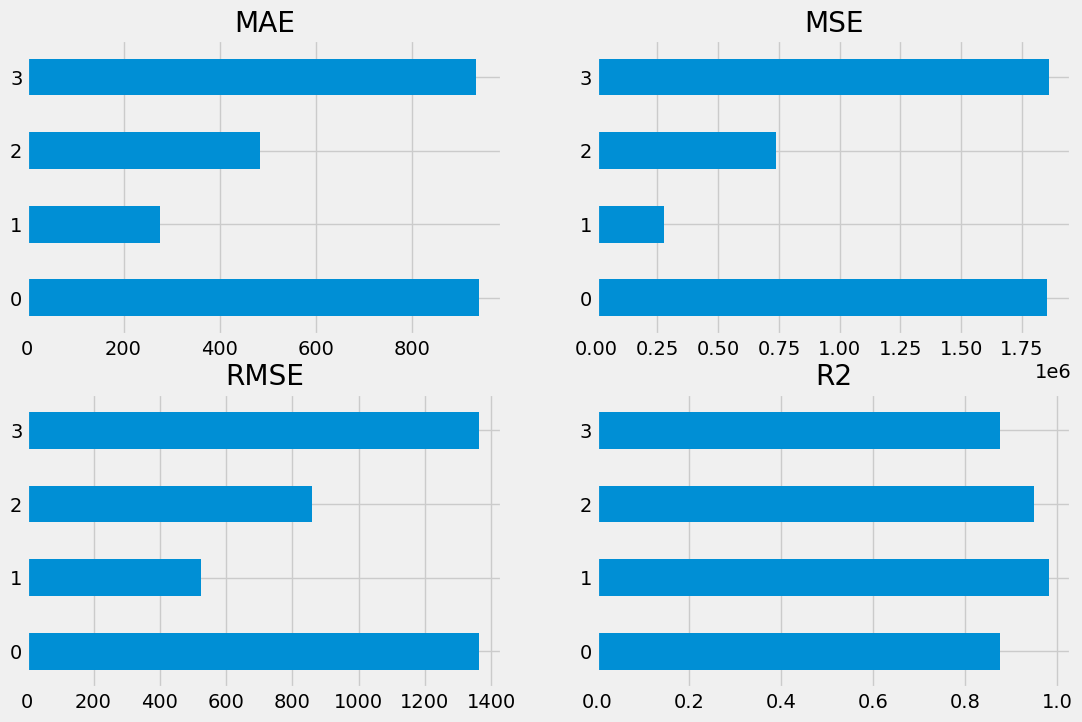

In [136]:
figure, axes = plt.subplots(nrows = 2, ncols = 2,
                            figsize=(10, 10))
results_df['MAE'].plot(kind='barh', figsize=(12, 8), ax = axes[0, 0], title = 'MAE')
results_df['MSE'].plot(kind='barh', figsize=(12, 8), ax = axes[0, 1], title = 'MSE')
results_df['RMSE'].plot(kind='barh', figsize=(12, 8), ax = axes[1, 0], title = 'RMSE')
results_df['R2 Score'].plot(kind='barh', figsize=(12, 8), ax = axes[1, 1], title = 'R2')


1. Thus, for the given dataset and prediction task, Random Forest Regressor has the best performance in three out of four metrics.

2. Next in terms of error rate is Gradient Boosting, followed by Ridge Regressor and linear regression, which are almost the same.

Its kinda obvious, because random forest and gradient boosting are more complicated models, then others.

 Linear and Ridge regressors are quite simular, because Ridge is useful, when there are multicollinearity in data. Diamonds train doesn't have this problem


